In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as sci

pd.set_option('float_format', '{:6.3f}'.format)
sns.set(style='ticks')

import warnings
warnings.filterwarnings("ignore")

In [2]:
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = 20,4

In [3]:
df = pd.read_csv('25_Portfolios_5x5.CSV',index_col = 0)

In [4]:
df = df[2248:2341]

In [5]:
df.head()

,SMALL LoBM,ME1 BM2,ME1 BM3,ME1 BM4,SMALL HiBM,ME2 BM1,ME2 BM2,ME2 BM3,ME2 BM4,ME2 BM5,...,ME4 BM1,ME4 BM2,ME4 BM3,ME4 BM4,ME4 BM5,BIG LoBM,ME5 BM2,ME5 BM3,ME5 BM4,BIG HiBM
1927,50.4923,35.8880,19.5953,33.1271,40.7509,50.2613,38.4408,35.9886,32.9132,47.5895,...,40.6641,42.1628,23.5308,26.0473,40.3948,46.1208,29.3302,22.5064,26.3199,29.2687
1928,10.4137,32.2554,42.9963,33.8804,74.1446,17.8825,46.4795,27.3451,37.3957,50.9493,...,57.8240,41.8220,24.4210,38.0253,20.9311,48.8486,36.0237,35.3808,16.7822,38.3214
1929,-51.5143,-57.8188,-56.5047,-48.2523,-44.8588,-51.5658,-40.4005,-34.8975,-37.7458,-33.6900,...,-31.4785,-33.5201,-12.2358,-12.9093,-5.0771,-19.8854,-1.9214,1.4418,3.7846,1.0090
1930,-53.0056,-70.1940,-46.6004,-46.4064,-49.6107,-50.8604,-32.0933,-33.8915,-45.7792,-45.3259,...,-31.6315,-35.5169,-38.6355,-38.2099,-44.4223,-25.5053,-25.9657,-25.5597,-39.6651,-73.8274
1931,-80.3455,-46.3768,-44.8314,-50.4617,-51.4150,-36.2900,-46.2009,-41.5359,-45.3161,-51.7558,...,-39.9857,-38.0975,-49.5010,-58.5161,-57.2458,-35.9306,-45.0190,-67.5205,-64.7571,-41.6031


In [6]:
df_ff = pd.read_csv('FF.csv')


In [7]:
df_ff = df_ff[1124:1217].reset_index()

In [8]:
df_m = pd.read_csv('mom.csv')

In [9]:
df_ff['Mom'] = df_m.iloc[:,1]

In [10]:
df_ff.head()

,index,Unnamed: 0,Mkt-RF,SMB,HML,RF,Mom
0,1124,1927,29.47,-2.46,-3.75,3.12,23.230
1,1125,1928,35.39,4.20,-6.15,3.56,28.200
2,1126,1929,-19.54,-30.80,11.81,4.75,21.290
3,1127,1930,-31.23,-5.13,-12.28,2.41,25.830
4,1128,1931,-45.11,3.53,-14.29,1.07,23.960


In [11]:
df_ff['Mkt-RF'] = df_ff['Mkt-RF'].map(lambda x: float(x))
df_ff['SMB'] = df_ff['SMB'].map(lambda x: float(x))
df_ff['HML'] = df_ff['HML'].map(lambda x: float(x))
df_ff['RF'] = df_ff['RF'].map(lambda x: float(x))

In [16]:
df_ff['SMB_gmean'] = 1+df_ff['SMB']/100

In [21]:
df_ff['Mkt-Rf_gmean'] = 1+df_ff['Mkt-RF']/100

In [22]:
(sci.gmean(df_ff['Mkt-Rf_gmean'])-1)*100

6.48637021819225

In [23]:
df_ff['Mkt-RF'].mean()

8.551182795698928

In [20]:
(sci.gmean(df_ff['SMB_gmean'])-1)*100

2.2050451054232756

In [12]:
df_ff['SMB'].mean()

3.067634408602151

In [24]:
df_ff['HML'].mean()

4.4891397849462376

In [25]:
df_ff['Mom'].mean()

9.117311827956986

In [27]:
df_ff = df_ff.set_index('Unnamed: 0')

In [28]:
df.columns

Index(['SMALL LoBM', 'ME1 BM2', 'ME1 BM3', 'ME1 BM4', 'SMALL HiBM', 'ME2 BM1',
       'ME2 BM2', 'ME2 BM3', 'ME2 BM4', 'ME2 BM5', 'ME3 BM1', 'ME3 BM2',
       'ME3 BM3', 'ME3 BM4', 'ME3 BM5', 'ME4 BM1', 'ME4 BM2', 'ME4 BM3',
       'ME4 BM4', 'ME4 BM5', 'BIG LoBM', 'ME5 BM2', 'ME5 BM3', 'ME5 BM4',
       'BIG HiBM'],
      dtype='object')

In [29]:
#A
from statsmodels.regression.linear_model import OLS

In [30]:
# CAPM
lst_capm = pd.DataFrame(columns = ['const','mrk','mean'])
for i in range(0,25):
    model = OLS(df.iloc[:,i].map(lambda x: float(x)) - df_ff['RF'], 
                sm.add_constant(df_ff['Mkt-RF']))
    result = model.fit(cov_type='HC0') 
    lst_capm = lst_capm.append({'const':result.params[0],'mrk':result.params[1],'mean':
                    ((df.iloc[:,i].map(lambda x: float(x)) - df_ff['RF']).mean())},ignore_index = True)
    print('PORTFOLIO',i+1,'\n',result.summary())

PORTFOLIO 1 
                             OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.607
Method:                 Least Squares   F-statistic:                     102.4
Date:                Wed, 04 Mar 2020   Prob (F-statistic):           1.42e-16
Time:                        14:06:08   Log-Likelihood:                -424.96
No. Observations:                  93   AIC:                             853.9
Df Residuals:                      91   BIC:                             859.0
Df Model:                           1                                         
Covariance Type:                  HC0                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.3931      2.031     -

There is some disperation between betas but overall it tends to be close to 1 in each portfolio, which is obvious, because each portfolio has quite lots of stocks. Each beta in portfolios is statistically significant, the standart errors are not so great. Returns differ in portfolios. In my opinion, betas are estimated well because we eliminated some idiosyncratic risks with a number of stocks in the portfolio, then we use more than 90 observations, which gives a quite good explanation in order to estimate betas. R sq. adj is quite high practically in each regression 

In [31]:
# 3 factors
lst_3 = pd.DataFrame(columns = ['const','mrk','SMB','HML','mean'])
for i in range(0,25):
    model = OLS(df.iloc[:,i].map(lambda x: float(x)) - df_ff['RF'], 
                sm.add_constant(df_ff[['Mkt-RF','SMB','HML']]))
    result = model.fit(cov_type='HC0') 
    lst_3 = lst_3.append({'const':result.params[0],'mrk':result.params[1],'SMB':result.params[2],'HML': result.params[3],
                          'mean': ((df.iloc[:,i].map(lambda x: float(x)) - df_ff['RF']).mean())},ignore_index = True)
    print('PORTFOLIO',i+1,'\n',result.summary())

PORTFOLIO 1 
                             OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     70.41
Date:                Wed, 04 Mar 2020   Prob (F-statistic):           2.02e-23
Time:                        14:06:08   Log-Likelihood:                -396.13
No. Observations:                  93   AIC:                             800.3
Df Residuals:                      89   BIC:                             810.4
Df Model:                           3                                         
Covariance Type:                  HC0                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.7092      1.590     -

In [32]:
model = OLS(lst_3['mean'],lst_3[['mrk','SMB','HML']])
result = model.fit(cov_type='HC0')
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                   mean   R-squared (uncentered):                   0.980
Model:                            OLS   Adj. R-squared (uncentered):              0.977
Method:                 Least Squares   F-statistic:                              456.7
Date:                Wed, 04 Mar 2020   Prob (F-statistic):                    5.90e-20
Time:                        14:06:09   Log-Likelihood:                         -48.844
No. Observations:                  25   AIC:                                      103.7
Df Residuals:                      22   BIC:                                      107.3
Df Model:                           3                                                  
Covariance Type:                  HC0                                                  
                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------

In [33]:
lst_3.head()

,const,mrk,SMB,HML,mean
0,-5.709,1.156,1.228,-0.437,5.984
1,-4.906,1.179,1.435,0.168,10.334
2,-0.944,1.008,1.273,0.309,12.969
3,0.752,1.003,1.324,0.575,15.973
4,1.169,1.093,1.310,0.791,18.085


There is some variability in betas. They have different values in the portfolios. Therefore, Returns differ. Betas most of them are statistically significant. the standart errors are not so high. Betas are quite well estimated 

In [34]:
# 4 factors 
lst_4 = pd.DataFrame(columns = ['const','mrk','SMB','HML','MOM','mean'])
for i in range(0,25):
    model = OLS(df.iloc[:,i].map(lambda x: float(x)) - df_ff['RF'], 
                sm.add_constant(df_ff[['Mkt-RF','SMB','HML','Mom']]))
    result = model.fit(cov_type='HC0') 
    lst_4 = lst_4.append({'const':result.params[0],'mrk':result.params[1],'SMB':result.params[2],'HML': result.params[3],
                          'MOM':result.params[4],
                          'mean': ((df.iloc[:,i].map(lambda x: float(x)) - df_ff['RF']).mean())},ignore_index = True)
    print('PORTFOLIO',i+1,'\n',result.summary())

PORTFOLIO 1 
                             OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     70.20
Date:                Wed, 04 Mar 2020   Prob (F-statistic):           1.43e-26
Time:                        14:06:10   Log-Likelihood:                -396.03
No. Observations:                  93   AIC:                             802.1
Df Residuals:                      88   BIC:                             814.7
Df Model:                           4                                         
Covariance Type:                  HC0                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.1669      2.031     -

Betas differ in portfolios, there is some dispertion. in some portfolios, beta of momentum is not statistically significant. the standart erros are not so high. Betas are quite well estimated.

In [35]:
lst_4

,const,mrk,SMB,HML,MOM,mean
0,-5.167,1.153,1.226,-0.445,-0.052,5.984
1,-6.193,1.186,1.440,0.188,0.124,10.334
2,-0.782,1.007,1.273,0.307,-0.016,12.969
3,-0.861,1.011,1.330,0.600,0.155,15.973
4,0.416,1.097,1.313,0.803,0.072,18.085
5,-3.312,1.154,1.129,-0.316,0.052,9.082
6,0.216,1.039,0.850,0.088,0.020,12.286
7,-0.003,0.992,0.876,0.305,0.050,12.993
8,-0.665,0.982,0.911,0.618,0.100,14.217
9,0.272,1.021,0.794,0.847,0.037,15.579


In [21]:
# 4 factors 
model = OLS(lst_4['mean'],lst_4[['mrk','SMB','HML','MOM']])
result = model.fit(cov_type='HC0')
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                   mean   R-squared (uncentered):                   0.980
Model:                            OLS   Adj. R-squared (uncentered):              0.976
Method:                 Least Squares   F-statistic:                              507.0
Date:                Mon, 24 Feb 2020   Prob (F-statistic):                    1.48e-20
Time:                        19:01:28   Log-Likelihood:                         -48.842
No. Observations:                  25   AIC:                                      105.7
Df Residuals:                      21   BIC:                                      110.6
Df Model:                           4                                                  
Covariance Type:                  HC0                                                  
                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------

In [204]:
#B
# CAPM
model = OLS(lst_capm['mean'],lst_capm['mrk'])
result = model.fit(cov_type='HC0')
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                   mean   R-squared (uncentered):                   0.952
Model:                            OLS   Adj. R-squared (uncentered):              0.950
Method:                 Least Squares   F-statistic:                              381.6
Date:                Sun, 16 Feb 2020   Prob (F-statistic):                    3.05e-16
Time:                        19:11:40   Log-Likelihood:                         -59.537
No. Observations:                  25   AIC:                                      121.1
Df Residuals:                      24   BIC:                                      122.3
Df Model:                           1                                                  
Covariance Type:                  HC0                                                  
                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------

In [190]:
from sklearn.metrics import mean_absolute_error
y_true = lst_capm['mean']
y_pred = result.predict()
mean_absolute_error(y_true, y_pred)

1.9544262003651232

In [207]:
(lst_capm['mean'] - result.predict()).abs()

0     7.738
1     4.585
2     0.023
3     2.699
4     3.830
5     4.429
6     0.243
7     1.187
8     2.216
9     3.287
10    2.538
11    1.173
12    1.417
13    2.212
14    2.521
15    0.862
16    0.281
17    0.697
18    1.683
19    0.273
20    0.778
21    0.557
22    0.334
23    1.632
24    1.664
Name: mean, dtype: float64

In [191]:
#r^2
1 - result.resid.var()/lst_capm['mean'].var()

0.11057967351368825

R^2 = 0.11 MAE = 1.95, the worst portfolio in terms of the absolute value is 1th and the best is 2th. the coefficient is significant, according to the r^2 it explains a small part of the return, therefore it is hard to say that it is a good explanation.

In [208]:
# 3 factors
model = OLS(lst_3['mean'],lst_3[['mrk','SMB','HML']])
result = model.fit(cov_type='HC0')
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                   mean   R-squared (uncentered):                   0.980
Model:                            OLS   Adj. R-squared (uncentered):              0.977
Method:                 Least Squares   F-statistic:                              456.7
Date:                Sun, 16 Feb 2020   Prob (F-statistic):                    5.90e-20
Time:                        19:13:08   Log-Likelihood:                         -48.844
No. Observations:                  25   AIC:                                      103.7
Df Residuals:                      22   BIC:                                      107.3
Df Model:                           3                                                  
Covariance Type:                  HC0                                                  
                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------

In [209]:
y_true = lst_3['mean']
y_pred = result.predict()
mean_absolute_error(y_true, y_pred)

1.3031229090161156

In [210]:
(lst_3['mean'] - result.predict()).abs()

0     3.941
1     3.540
2     0.101
3     1.579
4     1.771
5     1.214
6     1.278
7     1.174
8     0.756
9     0.684
10    0.897
11    2.364
12    0.975
13    0.950
14    0.362
15    2.349
16    0.416
17    0.010
18    0.203
19    2.035
20    1.584
21    0.026
22    0.206
23    3.524
24    0.638
Name: mean, dtype: float64

In [195]:
#r^2
1 - result.resid.var()/lst_3['mean'].var()

0.6221272598552762

r^2 = 0.62 MAE = 1.3, the worst portfolio is 1, the best is 21. All coefficients are statistically significant. This model explains better relatively to the capm, R^2 is higher we may see that there are other sources of risks that have to be considered such as HML and SMB.

In [294]:
# 4 factors 
model = OLS(lst_4['mean'],lst_4[['mrk','SMB','HML','MOM']])
result = model.fit(cov_type='HC0')
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                   mean   R-squared (uncentered):                   0.980
Model:                            OLS   Adj. R-squared (uncentered):              0.976
Method:                 Least Squares   F-statistic:                              507.0
Date:                Sun, 16 Feb 2020   Prob (F-statistic):                    1.48e-20
Time:                        20:00:15   Log-Likelihood:                         -48.842
No. Observations:                  25   AIC:                                      105.7
Df Residuals:                      21   BIC:                                      110.6
Df Model:                           4                                                  
Covariance Type:                  HC0                                                  
                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------

In [198]:
y_true = lst_4['mean']
y_pred = result.predict()
mean_absolute_error(y_true, y_pred)

1.3028439115326231

In [295]:
(lst_4['mean'] - result.predict()).abs()

0     3.914
1     3.556
2     0.120
3     1.554
4     1.767
5     1.217
6     1.279
7     1.169
8     0.739
9     0.680
10    0.894
11    2.364
12    0.963
13    0.976
14    0.363
15    2.355
16    0.420
17    0.026
18    0.225
19    2.032
20    1.568
21    0.014
22    0.234
23    3.562
24    0.581
Name: mean, dtype: float64

In [211]:
1 - result.resid.var()/lst_4['mean'].var()

0.6221272598552762

MAE = 1.3 and R^2 = 0.62. the best is 21, the worst is 1. Some of the coefficients are not statistically significant. We may see that some risk that were significant in the previous model now they are not, R^2 is a little lower. but anyway SMB is on the threshold of rejectivness, but Momentum has to be rejected. We see that some factors can not explain the return. Overall, some factors look significant to explain the return

In [13]:
#C
df_cat = pd.read_csv('CAT.csv')

In [14]:
df_cat = df_cat[::12].reset_index()

In [15]:
df_cat.tail()

,index,Date,Open,High,Low,Close,Adj Close,Volume
52,624,2015-01-01,91.770,92.370,78.810,79.970,67.002,169973700
53,636,2016-01-01,66.880,68.440,56.360,62.240,54.098,173549300
54,648,2017-01-01,94.000,99.460,92.200,95.660,87.713,94104300
55,660,2018-01-01,158.300,173.240,155.400,162.780,153.752,134897200
56,672,2019-01-01,124.030,137.720,120.440,133.160,128.588,119268900


In [16]:
cat_annual = ((df_cat['Adj Close'].diff(1)/df_cat['Adj Close'].shift(1))*100).dropna().reset_index()

In [17]:
df_c = df.iloc[36:92].reset_index()

In [18]:
df_c['CAT'] = cat_annual['Adj Close']

In [19]:
df_ff_c = df_ff.iloc[36:92]

In [21]:
df_ff_c = df_ff_c.reset_index()

In [22]:
df_c.head()

,index,SMALL LoBM,ME1 BM2,ME1 BM3,ME1 BM4,SMALL HiBM,ME2 BM1,ME2 BM2,ME2 BM3,ME2 BM4,...,ME4 BM2,ME4 BM3,ME4 BM4,ME4 BM5,BIG LoBM,ME5 BM2,ME5 BM3,ME5 BM4,BIG HiBM,CAT
0,1963,26.2508,3.9020,11.3832,14.9601,32.7199,3.0826,17.1182,11.7450,22.7273,...,11.2807,18.9099,36.0077,36.2663,23.3428,18.1439,19.6958,28.4633,32.3941,39.926
1,1964,13.9967,14.2725,20.2547,13.5883,26.9732,7.4793,6.2261,24.8312,15.3221,...,22.0860,21.1416,33.1177,20.4332,17.1139,11.9548,19.4766,19.0364,16.9240,58.832
2,1965,27.7725,46.0603,28.2754,41.2618,48.1191,32.9403,33.3136,30.5566,37.4205,...,23.0325,24.5699,24.2119,38.6765,16.2434,0.2768,12.1689,15.6650,15.1752,24.144
3,1966,-4.4033,-11.3709,-8.4801,-1.8447,-5.4626,-8.2936,-2.7818,-6.4249,-11.1357,...,-4.8224,-5.9896,-2.8207,-13.4372,-11.5304,-11.4946,-3.6717,-4.1965,-12.8265,-16.412
4,1967,137.3521,106.1138,92.4887,93.3931,88.3517,80.2195,65.7979,92.4845,72.5683,...,19.0849,30.6062,46.7156,44.8836,30.5279,17.5737,8.4074,22.3283,24.2836,1.845


In [52]:
model = OLS(df_c['ME1 BM2'].map(lambda x: float(x)) - df_ff_c['RF'], 
                sm.add_constant(df_ff_c[['Mkt-RF']]))
result = model.fit(cov_type='HC0')
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.594
Method:                 Least Squares   F-statistic:                     88.82
Date:                Mon, 24 Feb 2020   Prob (F-statistic):           5.34e-13
Time:                        14:04:27   Log-Likelihood:                -243.44
No. Observations:                  56   AIC:                             490.9
Df Residuals:                      54   BIC:                             494.9
Df Model:                           1                                         
Covariance Type:                  HC0                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.5361      2.354      0.653      0.514      -3.077       6.150
Mkt-RF         1.3315      0.141      9.424      0.000       1.055       1.608
==============================================================================
Omnibus:                       13.059   Durbin-Watson:                   1.369
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.054
Skew:                           0.941   Prob(JB):                     0.000538
Kurtosis:                       4.705   Cond. No.                         20.0
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC0)
"""

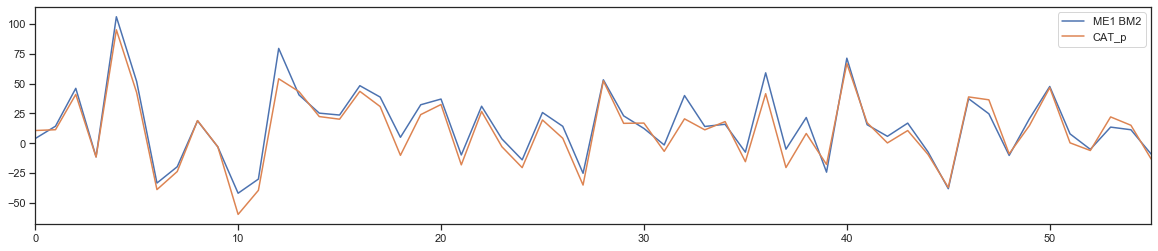

In [50]:
df_c['ME1 BM2'].map(lambda x: float(x)).plot()
df_c['CAT_p'].plot()
plt.legend()
plt.show()

In [49]:
df_c['CAT_p'] = result.predict()

In [53]:
model = OLS(df_c['ME1 BM2'].map(lambda x: float(x)) - df_ff_c['RF'], 
                sm.add_constant(df_ff_c[['Mkt-RF','SMB','HML','Mom']]))
result = model.fit(cov_type='HC0')
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     281.8
Date:                Mon, 24 Feb 2020   Prob (F-statistic):           4.28e-34
Time:                        14:04:30   Log-Likelihood:                -180.20
No. Observations:                  56   AIC:                             370.4
Df Residuals:                      51   BIC:                             380.5
Df Model:                           4                                         
Covariance Type:                  HC0                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0917      0.725     -1.506      0.132      -2.513       0.329
Mkt-RF         1.0666      0.055     19.382      0.000       0.959       1.175
SMB            1.3724      0.066     20.816      0.000       1.243       1.502
HML            0.0256      0.070      0.364      0.715      -0.112       0.163
Mom            0.0341      0.041      0.830      0.406      -0.046       0.115
==============================================================================
Omnibus:                        9.770   Durbin-Watson:                   1.856
Prob(Omnibus):                  0.008   Jarque-Bera (JB):                9.428
Skew:                           0.846   Prob(JB):                      0.00897
Kurtosis:                       4.084   Cond. No.                         26.5
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC0)
"""

In [23]:
df_ff_c

,level_0,index,Unnamed: 0,Mkt-RF,SMB,HML,RF,Mom
0,36,1160,1963,17.840,-5.880,15.660,3.120,11.640
1,37,1161,1964,12.540,-0.990,9.860,3.540,4.510
2,38,1162,1965,10.520,21.800,7.360,3.930,20.690
3,39,1163,1966,-13.510,2.590,-0.680,4.760,10.490
4,40,1164,1967,24.490,50.690,-8.570,4.210,22.690
5,41,1165,1968,8.790,24.500,18.500,5.210,2.220
6,42,1166,1969,-17.540,-13.980,-9.810,6.580,9.910
7,43,1167,1970,-6.490,-11.790,22.340,6.520,-3.260
8,44,1168,1971,11.780,5.620,-11.300,4.390,3.450
9,45,1169,1972,13.050,-11.950,1.750,3.840,15.560


In [458]:
# CAPM
lst_capm_c = pd.DataFrame(columns = ['const','mrk','mean'])
for i in range(1,27):
    model = OLS(df_c.iloc[:,i].map(lambda x: float(x)) - df_ff_c['RF'], 
                sm.add_constant(df_ff_c['Mkt-RF']))
    result = model.fit(cov_type='HC0') 
    lst_capm_c = lst_capm_c.append({'const':result.params[0],'mrk':result.params[1],'mean':
                    ((df_c.iloc[:,i].map(lambda x: float(x)) - df_ff_c['RF']).mean())},ignore_index = True)
    print('PORTFOLIO',i,'\n',result.summary())

PORTFOLIO 1 
                             OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.585
Model:                            OLS   Adj. R-squared:                  0.577
Method:                 Least Squares   F-statistic:                     78.17
Date:                Sun, 16 Feb 2020   Prob (F-statistic):           4.43e-12
Time:                        22:33:13   Log-Likelihood:                -254.80
No. Observations:                  56   AIC:                             513.6
Df Residuals:                      54   BIC:                             517.7
Df Model:                           1                                         
Covariance Type:                  HC0                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.7019      2.784     -

In [459]:
# 3 factors 
lst_3_c = pd.DataFrame(columns = ['const','mrk','SMB','HML','mean'])
for i in range(1,27):
    model = OLS(df_c.iloc[:,i].map(lambda x: float(x)) - df_ff_c['RF'], 
                sm.add_constant(df_ff_c[['Mkt-RF','SMB','HML']]))
    result = model.fit(cov_type='HC0') 
    lst_3_c = lst_3_c.append({'const':result.params[0],'mrk':result.params[1],'SMB':result.params[2],'HML': result.params[3],
                          'mean': ((df_c.iloc[:,i].map(lambda x: float(x)) - df_ff_c['RF']).mean())},ignore_index = True)
    print('PORTFOLIO',i,'\n',result.summary())

PORTFOLIO 1 
                             OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     116.4
Date:                Sun, 16 Feb 2020   Prob (F-statistic):           4.59e-23
Time:                        22:33:24   Log-Likelihood:                -206.03
No. Observations:                  56   AIC:                             420.1
Df Residuals:                      52   BIC:                             428.2
Df Model:                           3                                         
Covariance Type:                  HC0                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.0979      1.415     -

In [460]:
lst_4_c = pd.DataFrame(columns = ['const','mrk','SMB','HML','MOM','mean'])
for i in range(1,27):
    model = OLS(df_c.iloc[:,i].map(lambda x: float(x)) - df_ff_c['RF'], 
                sm.add_constant(df_ff_c[['Mkt-RF','SMB','HML','Mom']]))
    result = model.fit(cov_type='HC0') 
    lst_4_c = lst_4_c.append({'const':result.params[0],'mrk':result.params[1],'SMB':result.params[2],'HML': result.params[3],
                          'MOM':result.params[4],
                          'mean': ((df_c.iloc[:,i].map(lambda x: float(x)) - df_ff_c['RF']).mean())},ignore_index = True)
    print('PORTFOLIO',i,'\n',result.summary())

PORTFOLIO 1 
                             OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     95.26
Date:                Sun, 16 Feb 2020   Prob (F-statistic):           5.11e-23
Time:                        22:33:25   Log-Likelihood:                -204.75
No. Observations:                  56   AIC:                             419.5
Df Residuals:                      51   BIC:                             429.6
Df Model:                           4                                         
Covariance Type:                  HC0                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.4599      1.308     -

In [461]:
## 2 step CAPM

model = OLS(lst_capm_c['mean'],lst_capm_c['mrk'])
result = model.fit(cov_type='HC0')
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                   mean   R-squared (uncentered):                   0.888
Model:                            OLS   Adj. R-squared (uncentered):              0.883
Method:                 Least Squares   F-statistic:                              149.3
Date:                Sun, 16 Feb 2020   Prob (F-statistic):                    4.86e-12
Time:                        22:33:26   Log-Likelihood:                         -68.628
No. Observations:                  26   AIC:                                      139.3
Df Residuals:                      25   BIC:                                      140.5
Df Model:                           1                                                  
Covariance Type:                  HC0                                                  
                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------

In [462]:
y_true = lst_capm_c['mean']
y_pred = result.predict()
mean_absolute_error(y_true, y_pred)

2.59981954451334

In [463]:
(lst_capm_c['mean'] - result.predict()).abs()

0     9.076
1     1.317
2     0.300
3     4.288
4     4.787
5     5.815
6     0.022
7     2.163
8     3.480
9     4.063
10    4.945
11    0.990
12    1.499
13    2.948
14    5.298
15    2.229
16    0.795
17    0.545
18    2.528
19    1.045
20    2.256
21    1.180
22    0.261
23    1.192
24    0.074
25    4.499
Name: mean, dtype: float64

In [464]:
#r^2
1 - result.resid.var()/lst_capm_c['mean'].var()

-0.625714669079219

MAE = 2.9, R^2 = -0.6. We may see that R^2 is negative, MAE is larger, this model perfoms quite worse that the previous ones, the best relatively to an absolute error is 24, the worst is 1. the coefficient is statistically significant. I would not say that this model predicts risks well R^2 is negative and it doesn't well explain any risks by this model.

In [465]:
# 3 factors 

model = OLS(lst_3_c['mean'],lst_3_c[['mrk','SMB','HML']])
result = model.fit(cov_type='HC0')
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                   mean   R-squared (uncentered):                   0.973
Model:                            OLS   Adj. R-squared (uncentered):              0.969
Method:                 Least Squares   F-statistic:                              417.2
Date:                Sun, 16 Feb 2020   Prob (F-statistic):                    3.48e-20
Time:                        22:33:30   Log-Likelihood:                         -50.244
No. Observations:                  26   AIC:                                      106.5
Df Residuals:                      23   BIC:                                      110.3
Df Model:                           3                                                  
Covariance Type:                  HC0                                                  
                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------

In [466]:
y_true = lst_3_c['mean']
y_pred = result.predict()
mean_absolute_error(y_true, y_pred)

1.262600102604052

In [467]:
(lst_3_c['mean'] - result.predict()).abs()

0     4.008
1     0.170
2     0.535
3     2.105
4     1.360
5     0.855
6     0.813
7     1.298
8     0.548
9     0.310
10    0.077
11    1.236
12    0.239
13    0.092
14    1.039
15    3.115
16    0.738
17    1.134
18    0.386
19    1.392
20    2.167
21    0.152
22    0.405
23    3.118
24    2.415
25    3.122
Name: mean, dtype: float64

In [468]:
#r^2
1 - result.resid.var()/lst_3_c['mean'].var()

0.6010131935560621

MAE = 1.74, R^2 = 0.6. The best is 12, the worst is 0. All coefficients are statistically significant. This model explains practically the same. there are not lots of huge difference, everything is practically the same relatively to the previous model wothout the stock. the model explains that there are three factors that affect the return of the asset. Overall, R^2 not so high, therefore, some percent are not explained well.

In [469]:
# 4 factors

model = OLS(lst_4_c['mean'],lst_4_c[['mrk','SMB','HML','MOM']])
result = model.fit(cov_type='HC0')
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                   mean   R-squared (uncentered):                   0.979
Model:                            OLS   Adj. R-squared (uncentered):              0.975
Method:                 Least Squares   F-statistic:                              789.7
Date:                Sun, 16 Feb 2020   Prob (F-statistic):                    2.07e-23
Time:                        22:33:43   Log-Likelihood:                         -46.994
No. Observations:                  26   AIC:                                      102.0
Df Residuals:                      22   BIC:                                      107.0
Df Model:                           4                                                  
Covariance Type:                  HC0                                                  
                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------

In [470]:
y_true = lst_4_c['mean']
y_pred = result.predict()
mean_absolute_error(y_true, y_pred)

1.1366178770319995

In [471]:
(lst_4_c['mean'] - result.predict()).abs()

0     3.659
1     0.198
2     0.790
3     2.579
4     1.076
5     1.049
6     0.413
7     1.162
8     1.257
9     0.159
10    0.109
11    1.465
12    0.237
13    0.369
14    1.104
15    2.921
16    0.892
17    1.324
18    0.139
19    0.989
20    2.569
21    0.616
22    0.285
23    1.893
24    2.024
25    0.274
Name: mean, dtype: float64

In [472]:
1 - result.resid.var()/lst_4['mean'].var()

0.718738508990535

R^2 = 0.71, MAE = 1,13 . the best is 1, the worst is 0. this model works better relatively to the previous one in 'b'. all factors are statistically significant. R^2 is quite high. There is a huge difference according to the previous model in the momentum factor and some other factors are changed as well but for a little. This model explains practically 72% of risks, which is quite good. the intuition is that all factors influence the return. The model quite well predicts the returns of the assets.

In [396]:
#D

df_d = pd.read_csv('industry.csv')

In [397]:
df_d = df_d[2248:2341].reset_index()

In [398]:
df_d.head()

,index,Unnamed: 0,Agric,Food,Soda,Beer,Smoke,Toys,Fun,Books,...,Boxes,Trans,Whlsl,Rtail,Meals,Banks,Insur,RlEst,Fin,Other
0,2248,1927,26.23,41.88,-99.99,64.22,47.72,-22.67,15.66,8.97,...,53.67,22.73,-45.47,43.54,32.80,24.00,119.97,19.90,50.06,24.64
1,2249,1928,2.46,27.95,-99.99,38.80,-2.30,44.33,46.38,35.48,...,32.66,15.76,24.16,55.26,28.12,103.26,14.67,42.25,38.37,-8.47
2,2250,1929,-16.27,-14.53,-99.99,-16.07,-7.17,-57.07,-36.28,-4.72,...,3.55,1.45,-49.56,-41.48,-4.90,-31.57,-36.61,2.00,-27.63,-62.25
3,2251,1930,-47.79,-11.23,-99.99,-53.28,-3.24,-20.45,-19.85,-15.73,...,-14.61,-29.15,-47.91,-34.98,-29.47,-19.14,-28.54,-61.34,-52.20,-32.66
4,2252,1931,-48.67,-33.53,-99.99,-43.07,-20.18,-67.55,-74.40,-65.88,...,-38.10,-60.80,-60.86,-25.20,-46.16,-36.98,-47.64,-66.34,-53.55,-0.32


In [399]:
df_ff = df_ff.reset_index()

In [400]:
# CAPM
lst_capm_d = pd.DataFrame(columns = ['const','mrk','mean'])
for i in range(2,51):
    model = OLS(df_d.iloc[:,i].map(lambda x: float(x)) - df_ff['RF'], 
                sm.add_constant(df_ff['Mkt-RF']))
    result = model.fit(cov_type='HC0') 
    lst_capm_d = lst_capm_d.append({'const':result.params[0],'mrk':result.params[1],'mean':
                    ((df_d.iloc[:,i].map(lambda x: float(x)) - df_ff['RF']).mean())},ignore_index = True)
    print('PORTFOLIO',i-1,'\n',result.summary())

PORTFOLIO 1 
                             OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.384
Model:                            OLS   Adj. R-squared:                  0.377
Method:                 Least Squares   F-statistic:                     29.61
Date:                Sun, 16 Feb 2020   Prob (F-statistic):           4.43e-07
Time:                        21:55:42   Log-Likelihood:                -420.82
No. Observations:                  93   AIC:                             845.6
Df Residuals:                      91   BIC:                             850.7
Df Model:                           1                                         
Covariance Type:                  HC0                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7541      2.137      

There is quite high disperation between betas the same as returns. beta is practically significant for each portfolio. the average standart erros of the estimate is about 0.1, which is normal. In my opinion some betas are not well explained according to R^2, because in some regressions R^2 is quite low. Anyway there are more than 90 observations, it should be enough to explain, but as i said some of them are not significant.


In [345]:
# 3 factors
lst_3_d = pd.DataFrame(columns = ['const','mrk','SMB','HML','mean'])
for i in range(2,51):
    model = OLS(df_d.iloc[:,i].map(lambda x: float(x)) - df_ff['RF'], 
                sm.add_constant(df_ff[['Mkt-RF','SMB','HML']]))
    result = model.fit(cov_type='HC0') 
    lst_3_d = lst_3_d.append({'const':result.params[0],'mrk':result.params[1],'SMB':result.params[2],'HML': result.params[3],
                          'mean': ((df_d.iloc[:,i].map(lambda x: float(x)) - df_ff['RF']).mean())},ignore_index = True)
    print('PORTFOLIO',i-1,'\n',result.summary())

PORTFOLIO 1 
                             OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.431
Model:                            OLS   Adj. R-squared:                  0.411
Method:                 Least Squares   F-statistic:                     16.45
Date:                Sun, 16 Feb 2020   Prob (F-statistic):           1.38e-08
Time:                        20:32:18   Log-Likelihood:                -417.17
No. Observations:                  93   AIC:                             842.3
Df Residuals:                      89   BIC:                             852.5
Df Model:                           3                                         
Covariance Type:                  HC0                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0435      2.497     -

We may see quite high dispersion in different regressions, some of the coefficients are not statistically significant. Returns are different. In some regressions R^2 is quite low. In some regressions the standart error can be high for some coefficients about 0.5 or more. Betas in some regressions are not well estimated relatively to the standart error and r^2. 

In [348]:
# 4 factors 
lst_4_d = pd.DataFrame(columns = ['const','mrk','SMB','HML','MOM','mean'])
for i in range(2,51):
    model = OLS(df_d.iloc[:,i].map(lambda x: float(x)) - df_ff['RF'], 
                sm.add_constant(df_ff[['Mkt-RF','SMB','HML','Mom']]))
    result = model.fit(cov_type='HC0') 
    lst_4_d = lst_4_d.append({'const':result.params[0],'mrk':result.params[1],'SMB':result.params[2],'HML': result.params[3],
                          'MOM':result.params[4],
                          'mean': ((df_d.iloc[:,i].map(lambda x: float(x)) - df_ff['RF']).mean())},ignore_index = True)
    print('PORTFOLIO',i-1,'\n',result.summary())

PORTFOLIO 1 
                             OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.431
Model:                            OLS   Adj. R-squared:                  0.405
Method:                 Least Squares   F-statistic:                     17.81
Date:                Sun, 16 Feb 2020   Prob (F-statistic):           9.62e-11
Time:                        20:33:12   Log-Likelihood:                -417.16
No. Observations:                  93   AIC:                             844.3
Df Residuals:                      88   BIC:                             857.0
Df Model:                           4                                         
Covariance Type:                  HC0                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2998      2.602     -

Betas differ substantially over the regressions. the standart error is quite high in some regressions. some coefficients are not statistically significant. R^2 in some regressions is too low about 0. Some coefficients are not well explained by this model.

In [349]:
#E

model = OLS(lst_capm_d['mean'],lst_capm_d['mrk'])
result = model.fit(cov_type='HC0')
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                   mean   R-squared (uncentered):                   0.270
Model:                            OLS   Adj. R-squared (uncentered):              0.255
Method:                 Least Squares   F-statistic:                              181.9
Date:                Sun, 16 Feb 2020   Prob (F-statistic):                    6.01e-18
Time:                        20:47:48   Log-Likelihood:                         -197.57
No. Observations:                  49   AIC:                                      397.1
Df Residuals:                      48   BIC:                                      399.0
Df Model:                           1                                                  
Covariance Type:                  HC0                                                  
                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------

In [351]:
y_true = lst_capm_d['mean']
y_pred = result.predict()
mean_absolute_error(y_true, y_pred)

6.543570805588446

In [353]:
(lst_capm_d['mean'] - result.predict()).abs()

0     1.097
1     3.445
2    34.935
3     3.044
4     7.254
5     0.232
6     2.378
7     0.198
8     1.222
9     1.325
10   44.160
11    5.072
12    4.593
13    1.220
14    4.488
15    0.371
16    0.288
17    0.320
18    2.503
19   39.117
20    0.305
21    1.643
22    0.602
23    4.394
24    0.590
25   33.919
26   35.695
27    1.103
28    3.009
29    2.378
30    2.145
31    2.179
32    1.915
33    0.086
34    2.608
35   41.044
36    0.485
37    3.078
38    4.953
39    2.949
40    0.510
41    0.818
42    1.954
43    2.349
44    3.351
45    2.535
46    3.529
47    0.798
48    2.451
Name: mean, dtype: float64

In [354]:
#r^2
1 - result.resid.var()/lst_capm_d['mean'].var()

0.2759996443363043

R^2 = 0.28 MAE = 6.5 , the worst is 10, the best is 33. The coefficient is significant. There is a little part explained by this factor. These risk looks a little bit significant. if we consider the previous model MAE is smaller but R^2 is a little smaller, the beta is a little higher. I would not say that this model is better because there are some huge differences between the predicted values and the realized ones

In [355]:
# 3 factors 

model = OLS(lst_3_d['mean'],lst_3_d[['mrk','SMB','HML']])
result = model.fit(cov_type='HC0')
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                   mean   R-squared (uncentered):                   0.448
Model:                            OLS   Adj. R-squared (uncentered):              0.412
Method:                 Least Squares   F-statistic:                              48.39
Date:                Sun, 16 Feb 2020   Prob (F-statistic):                    2.85e-14
Time:                        20:49:38   Log-Likelihood:                         -190.74
No. Observations:                  49   AIC:                                      387.5
Df Residuals:                      46   BIC:                                      393.2
Df Model:                           3                                                  
Covariance Type:                  HC0                                                  
                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------

In [356]:
y_true = lst_3_d['mean']
y_pred = result.predict()
mean_absolute_error(y_true, y_pred)

7.60101831659908

In [358]:
(lst_3_d['mean'] - result.predict()).abs()

0     2.134
1     0.387
2    34.650
3     0.332
4     3.028
5     7.999
6     6.891
7     2.238
8     0.870
9     8.567
10   42.327
11    9.902
12    4.200
13    1.884
14    1.866
15    2.969
16    3.291
17    2.685
18    9.606
19   29.388
20    2.285
21    1.226
22    5.575
23    4.896
24    8.456
25   31.821
26   24.369
27    1.492
28    4.947
29    5.978
30    8.436
31    4.654
32   12.521
33    3.122
34    5.078
35   11.993
36    3.690
37   11.311
38    3.746
39    3.171
40    8.466
41    3.673
42    4.048
43    5.392
44    2.771
45    0.731
46    3.669
47    5.490
48    4.228
Name: mean, dtype: float64

In [359]:
#r^2
1 - result.resid.var()/lst_3_d['mean'].var()

0.44799697812769235

R^2 = 0.44 MAE = 7.6. The best is 3, the worst is 10. SMB factor is on the threshold to be rejected, the other factors are statistically significant. Risks look quite significant but not so much, because R^2 is not so high. There are some difference between this model and the previous one, the huge difference between coefficients, R^2 is higher in the first one and the same as MAE is smaller in the first model. I would say the first model definitely explains risks much better, espesially we may that this model predicts not so well.

In [360]:
# 4 factors

model = OLS(lst_4_d['mean'],lst_4_d[['mrk','SMB','HML','MOM']])
result = model.fit(cov_type='HC0')
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                   mean   R-squared (uncentered):                   0.708
Model:                            OLS   Adj. R-squared (uncentered):              0.682
Method:                 Least Squares   F-statistic:                              34.00
Date:                Sun, 16 Feb 2020   Prob (F-statistic):                    4.50e-13
Time:                        20:50:47   Log-Likelihood:                         -175.13
No. Observations:                  49   AIC:                                      358.3
Df Residuals:                      45   BIC:                                      365.8
Df Model:                           4                                                  
Covariance Type:                  HC0                                                  
                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------

In [361]:
y_true = lst_4_d['mean']
y_pred = result.predict()
mean_absolute_error(y_true, y_pred)

6.6493353444326875

In [362]:
(lst_4_d['mean'] - result.predict()).abs()

0     0.847
1     2.514
2    10.284
3     9.244
4     7.722
5     4.250
6     9.694
7     4.318
8     2.637
9    11.949
10   25.498
11    8.197
12    0.558
13    1.999
14    9.463
15    2.544
16    1.997
17   12.418
18    7.016
19    8.606
20    0.694
21    6.369
22    4.128
23    4.759
24   12.455
25   21.860
26   18.913
27   13.727
28   12.843
29    9.349
30    4.218
31    0.275
32    3.193
33    6.754
34    4.250
35    7.061
36    0.121
37    7.344
38   11.939
39    3.886
40    6.049
41    1.275
42    4.707
43    5.146
44    0.211
45    1.798
46    5.699
47    0.247
48    4.795
Name: mean, dtype: float64

In [363]:
1 - result.resid.var()/lst_4_d['mean'].var()

0.6951609927890388

MAE = 6.65, R^2 = 0.7. the best is 12, the worst is 25. the second coefficients (SMB) is not statistically significant. R^2 is quite high, but we may see that MAE is also high, especially the momentum factor has a quite huge impact on the return. This model looks not so good because it predicts not so well as the first model. There is a huge difference in the coefficients with the first model. the first model predicts much better, therefore it can explain factors of the risk a little better. R^2 was higher, MAE is lower. Overall, this model may explain some portfolio returns but not every one.

In [403]:
#F
df_f = df_d[36:92].reset_index()

In [404]:
df_f['CAT'] = cat_annual['Adj Close']

In [414]:
df_ff_f = df_ff[36:92]

In [417]:
del df_ff_f['level_0']

In [419]:
df_ff_f = df_ff_f.reset_index()

In [420]:
df_f.head()

,level_0,index,Unnamed: 0,Agric,Food,Soda,Beer,Smoke,Toys,Fun,...,Trans,Whlsl,Rtail,Meals,Banks,Insur,RlEst,Fin,Other,CAT
0,36,2284,1963,25.43,17.74,-99.99,3.66,8.32,2.61,13.68,...,39.43,5.05,20.46,-5.86,5.09,-4.12,4.79,18.75,54.91,39.926
1,37,2285,1964,18.24,9.17,20.04,17.30,7.38,-8.48,0.45,...,20.48,13.07,32.75,24.38,-7.33,4.37,-10.81,7.72,6.18,58.832
2,38,2286,1965,59.35,4.18,22.90,26.34,11.91,110.57,36.27,...,33.24,41.11,5.33,31.15,3.73,7.62,19.92,13.04,47.64,24.144
3,39,2287,1966,0.59,-11.04,0.14,-6.40,-13.62,-25.79,1.08,...,-2.30,1.76,-24.70,-10.85,-6.52,6.09,-12.10,-8.51,-26.32,-16.412
4,40,2288,1967,15.41,24.14,38.16,25.70,29.10,33.97,98.22,...,8.33,100.82,41.14,150.14,17.08,-6.80,99.91,50.69,72.23,1.845


In [421]:
#CAPM
lst_capm_f = pd.DataFrame(columns = ['const','mrk','mean'])
for i in range(3,53):
    model = OLS(df_f.iloc[:,i].map(lambda x: float(x)) - df_ff_f['RF'], 
                sm.add_constant(df_ff_f['Mkt-RF']))
    result = model.fit(cov_type='HC0') 
    lst_capm_f = lst_capm_f.append({'const':result.params[0],'mrk':result.params[1],'mean':
                    ((df_f.iloc[:,i].map(lambda x: float(x)) - df_ff_f['RF']).mean())},ignore_index = True)
    print('PORTFOLIO',i-2,'\n',result.summary())

PORTFOLIO 1 
                             OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.329
Model:                            OLS   Adj. R-squared:                  0.317
Method:                 Least Squares   F-statistic:                     57.95
Date:                Sun, 16 Feb 2020   Prob (F-statistic):           4.18e-10
Time:                        22:00:14   Log-Likelihood:                -244.38
No. Observations:                  56   AIC:                             492.8
Df Residuals:                      54   BIC:                             496.8
Df Model:                           1                                         
Covariance Type:                  HC0                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.1154      2.701      

In [422]:
# 3 factors 
lst_3_f = pd.DataFrame(columns = ['const','mrk','SMB','HML','mean'])
for i in range(3,53):
    model = OLS(df_f.iloc[:,i].map(lambda x: float(x)) - df_ff_f['RF'], 
                sm.add_constant(df_ff_f[['Mkt-RF','SMB','HML']]))
    result = model.fit(cov_type='HC0') 
    lst_3_f = lst_3_f.append({'const':result.params[0],'mrk':result.params[1],'SMB':result.params[2],'HML': result.params[3],
                          'mean': ((df_f.iloc[:,i].map(lambda x: float(x)) - df_ff_f['RF']).mean())},ignore_index = True)
    print('PORTFOLIO',i-2,'\n',result.summary())

PORTFOLIO 1 
                             OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.337
Model:                            OLS   Adj. R-squared:                  0.299
Method:                 Least Squares   F-statistic:                     21.05
Date:                Sun, 16 Feb 2020   Prob (F-statistic):           4.62e-09
Time:                        22:01:36   Log-Likelihood:                -244.03
No. Observations:                  56   AIC:                             496.1
Df Residuals:                      52   BIC:                             504.2
Df Model:                           3                                         
Covariance Type:                  HC0                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2632      3.721      

In [423]:
# 4 factors 
lst_4_f = pd.DataFrame(columns = ['const','mrk','SMB','HML','MOM','mean'])
for i in range(3,53):
    model = OLS(df_f.iloc[:,i].map(lambda x: float(x)) - df_ff_f['RF'], 
                sm.add_constant(df_ff_f[['Mkt-RF','SMB','HML','Mom']]))
    result = model.fit(cov_type='HC0') 
    lst_4_f = lst_4_f.append({'const':result.params[0],'mrk':result.params[1],'SMB':result.params[2],'HML': result.params[3],
                          'MOM':result.params[4],
                          'mean': ((df_f.iloc[:,i].map(lambda x: float(x)) - df_ff_f['RF']).mean())},ignore_index = True)
    print('PORTFOLIO',i-2,'\n',result.summary())

PORTFOLIO 1 
                             OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.345
Model:                            OLS   Adj. R-squared:                  0.294
Method:                 Least Squares   F-statistic:                     16.35
Date:                Sun, 16 Feb 2020   Prob (F-statistic):           1.11e-08
Time:                        22:02:38   Log-Likelihood:                -243.70
No. Observations:                  56   AIC:                             497.4
Df Residuals:                      51   BIC:                             507.5
Df Model:                           4                                         
Covariance Type:                  HC0                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1125      3.410     -

In [424]:
## 2 step CAPM

model = OLS(lst_capm_f['mean'],lst_capm_f['mrk'])
result = model.fit(cov_type='HC0')
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                   mean   R-squared (uncentered):                   0.819
Model:                            OLS   Adj. R-squared (uncentered):              0.816
Method:                 Least Squares   F-statistic:                              238.6
Date:                Sun, 16 Feb 2020   Prob (F-statistic):                    1.84e-20
Time:                        22:03:10   Log-Likelihood:                         -134.15
No. Observations:                  50   AIC:                                      270.3
Df Residuals:                      49   BIC:                                      272.2
Df Model:                           1                                                  
Covariance Type:                  HC0                                                  
                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------

In [425]:
y_true = lst_capm_f['mean']
y_pred = result.predict()
mean_absolute_error(y_true, y_pred)

2.50160601950183

In [426]:
(lst_capm_f['mean'] - result.predict()).abs()

0     1.667
1     3.497
2     2.930
3     3.612
4     9.481
5     2.990
6     3.697
7     0.365
8     0.613
9     1.224
10   12.388
11    4.335
12    3.758
13    0.135
14    1.040
15    0.115
16    0.385
17    0.781
18    3.380
19    4.011
20    0.208
21    0.713
22    2.955
23    2.029
24    2.649
25    4.634
26    2.405
27    1.630
28    5.350
29    2.071
30    1.359
31    0.327
32    1.963
33    0.452
34    0.454
35    8.626
36    1.473
37    0.134
38    0.773
39    2.006
40    0.205
41    0.856
42    1.507
43    2.667
44    0.225
45    2.130
46    3.736
47    0.186
48    5.101
49    5.853
Name: mean, dtype: float64

In [427]:
#r^2
1 - result.resid.var()/lst_capm_f['mean'].var()

-0.3757115674250344

This model actually perfoms a little bit better relatively without the stock according to absolute values, it predicts much better. R^2 = -0.3
MAE = 2.5. the best is 13, the worst is 10. the coefficient is statistically significant. relatively to r^2 it is not a good model, but if we look to MAE and the differences it fits quite well. this factor explain a little bit of the risk but not all. the coefficient is less relatively to the previous model, MAE is smaller and R^2 is better. 

In [428]:
# 3 factors 

model = OLS(lst_3_f['mean'],lst_3_f[['mrk','SMB','HML']])
result = model.fit(cov_type='HC0')
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                   mean   R-squared (uncentered):                   0.846
Model:                            OLS   Adj. R-squared (uncentered):              0.836
Method:                 Least Squares   F-statistic:                              108.4
Date:                Sun, 16 Feb 2020   Prob (F-statistic):                    3.96e-21
Time:                        22:04:37   Log-Likelihood:                         -130.14
No. Observations:                  50   AIC:                                      266.3
Df Residuals:                      47   BIC:                                      272.0
Df Model:                           3                                                  
Covariance Type:                  HC0                                                  
                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------

In [429]:
y_true = lst_3_f['mean']
y_pred = result.predict()
mean_absolute_error(y_true, y_pred)

2.3978419641105813

In [430]:
(lst_3_f['mean'] - result.predict()).abs()

0     1.197
1     2.062
2     1.946
3     3.180
4     7.526
5     2.835
6     4.392
7     1.244
8     0.453
9     1.685
10   13.000
11    5.416
12    3.311
13    0.579
14    1.104
15    1.496
16    1.321
17    0.384
18    3.869
19    3.061
20    0.418
21    1.216
22    4.637
23    2.123
24    0.943
25    3.824
26    4.249
27    1.949
28    4.502
29    1.263
30    0.707
31    1.093
32    1.137
33    0.808
34    1.046
35    2.494
36    0.349
37    1.619
38    0.141
39    2.154
40    0.801
41    1.108
42    1.244
43    3.754
44    2.312
45    0.259
46    3.440
47    0.752
48    5.273
49    4.215
Name: mean, dtype: float64

In [431]:
#r^2
1 - result.resid.var()/lst_3_f['mean'].var()

-0.1833066913918313

MAE = 2.4 R^2 = -0.18. Two factors are not statistically significant. It fits quite well acording to the realized values and the predicted ones. the best is 45, the worst is 10. This model doesn't explain actually other two fators, just the first one, the market risk. There are some differences with model in C, especially in the coefficients they are all different. R^2 is better. MAE is worse. 

In [432]:
# 4 factors

model = OLS(lst_4_f['mean'],lst_4_f[['mrk','SMB','HML','MOM']])
result = model.fit(cov_type='HC0')
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                   mean   R-squared (uncentered):                   0.847
Model:                            OLS   Adj. R-squared (uncentered):              0.833
Method:                 Least Squares   F-statistic:                              83.99
Date:                Sun, 16 Feb 2020   Prob (F-statistic):                    1.53e-20
Time:                        22:06:05   Log-Likelihood:                         -130.09
No. Observations:                  50   AIC:                                      268.2
Df Residuals:                      46   BIC:                                      275.8
Df Model:                           4                                                  
Covariance Type:                  HC0                                                  
                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------

In [434]:
y_true = lst_4_f['mean']
y_pred = result.predict()
mean_absolute_error(y_true, y_pred)

2.4010351876930325

In [436]:
(lst_4_f['mean'] - result.predict()).abs()

0     1.328
1     2.089
2     1.790
3     3.293
4     7.501
5     2.766
6     4.299
7     1.231
8     0.558
9     1.585
10   12.979
11    5.478
12    3.459
13    0.752
14    1.130
15    1.504
16    1.277
17    0.077
18    4.008
19    3.254
20    0.516
21    1.355
22    4.880
23    2.232
24    1.044
25    4.029
26    4.332
27    1.643
28    4.119
29    1.428
30    0.655
31    1.069
32    0.982
33    0.908
34    0.913
35    2.526
36    0.372
37    1.652
38    0.258
39    2.054
40    0.749
41    1.201
42    1.250
43    3.774
44    2.138
45    0.410
46    3.583
47    0.696
48    5.058
49    3.865
Name: mean, dtype: float64

In [437]:
1 - result.resid.var()/lst_4_f['mean'].var()

-0.18063666851590687

MAE = 2.4 R^2 = -0.18. the best is 17, the worst is 10. Practically all factors are not statistically significant except the first one. The model badly explains other risk factors. There is just the market risk. The difference with the model in 'c', especially in the coefficients. they are all different with huge differences. R^2 is worse the same as MAE.  